In [ ]:
import torch
import torchaudio

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"


import IPython
import matplotlib.pyplot as plt


In [ ]:
torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}

# Load models and processor once
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

torch.backends.cudnn.benchmark = True  # Enable cudnn benchmark for better performance


def text_to_speech(text):
    with torch.inference_mode():
        processed, lengths = processor(text)
        processed = processed.to(device)
        lengths = lengths.to(device)
        spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        waveforms, lengths = vocoder.infer(spec, spec_lengths)
    return waveforms[0:1].cpu().detach()


/home/gilbe/ai_assistant/.venv/lib/python3.11/site-packages/dp/model/model.py:306: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map

tensor([[54, 20, 65, 69, 11, 92, 44, 65, 38,  2, 11, 81, 40, 64, 79, 81, 11, 81,
         20, 11, 79, 77, 59, 37,  2]])
tensor([25], dtype=torch.int32)
tensor([[54, 20, 65, 69, 11, 92, 44, 38,  2, 11, 81, 40, 64, 79, 81, 11, 81, 20,
         11, 79, 77, 40, 64,  2]])
tensor([24], dtype=torch.int32)
torch.Size([80, 190])
torch.Size([80, 184])
torch.Size([80, 185])


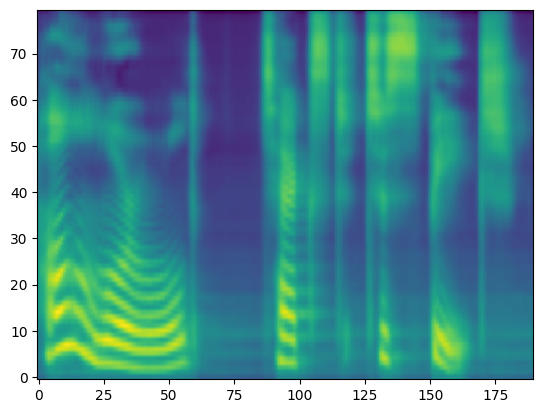

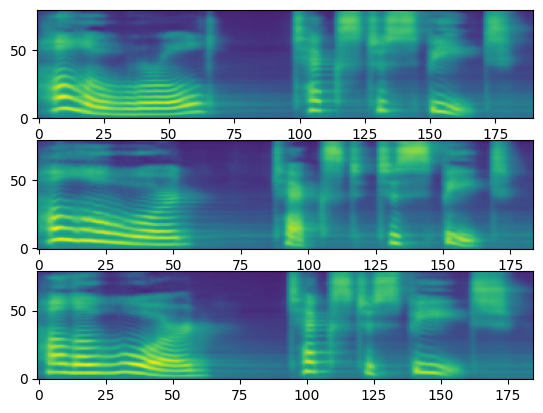

In [ ]:
# symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
# look_up = {s: i for i, s in enumerate(symbols)}


# def text_to_sequence(text):
#     text = text.lower()
#     return [look_up[s] for s in text if s in symbols]


# text = "Hello world! Text to speech!"
# print(text_to_sequence(text))


# processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()
text = "Hello world! Text to speech!"
processed, lengths = processor(text)
print(processed)
print(lengths)

bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
text = "Hello word! Text to spech!"
with torch.inference_mode():
    processed, lengths = processor(text)
print(processed)
print(lengths)


bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
text = "Hello world! Text to speech!"
with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)

_ = plt.imshow(spec[0].cpu().detach(), aspect="auto", origin="lower")


def plot():
    fig, ax = plt.subplots(3, 1)
    for i in range(3):
        with torch.inference_mode():
            spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        print(spec[0].shape)
        ax[i].imshow(spec[0].cpu().detach(), aspect="auto", origin="lower")


plot()


In [ ]:
# bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

# processor = bundle.get_text_processor()
# tacotron2 = bundle.get_tacotron2().to(device)
# vocoder = bundle.get_vocoder().to(device)


import time

from numpy import cast
from regex import D

start_time = time.time()

text = "Hello world! Text to speech, my name is gilberto!"

with torch.inference_mode(), torch.amp.autocast(device_type="cuda"):
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)


end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


Time taken: 111.72 seconds


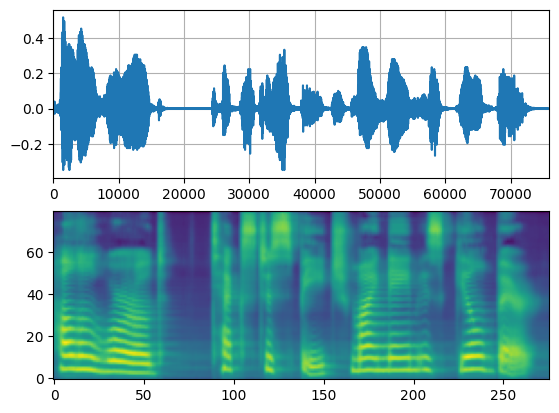

In [ ]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)


In [ ]:
vocoder.sample_rate


22050

In [ ]:
IPython.display.Audio(waveforms[0:1].cpu().detach(), rate=vocoder.sample_rate)
